In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Market Investing Simulation

In [46]:


def simulate_investment(final_investment, num_years, real_return, standard_deviation, monthly_contribution, increase_saving_rate):
    """
    Simulates the growth of an investment over a given number of years.

    Parameters:
    final_investment (float): The initial amount of investment.
    num_years (int): The number of years to simulate.
    real_return (float): The expected annual real return rate (as a decimal).
    standard_deviation (float): The standard deviation of the return.
    monthly_contribution (float): The fixed monthly contribution.
    increase_saving_rate (float): The annual inflation rate (as a decimal).

    Returns:
    float: The final value of the investment after the simulation.
    """
    for year in range(num_years):
        for month in range(12):
            monthly_return = np.random.normal(real_return / 12, standard_deviation / np.sqrt(12))
            final_investment *= (1 + monthly_return)
            if year > 0 and month == 0:  # Adjust contribution annually
                monthly_contribution *= (1 + increase_saving_rate)
            final_investment += monthly_contribution

    return final_investment


# Constants - These are based on historical S&P 500 data
AVERAGE_RETURN = 0.0955  # This is the nominal return
INFLATION_RATE = 0.035 # This is the inflation rate
REAL_RETURN = ((1+AVERAGE_RETURN)/(1+INFLATION_RATE))-1 #AVERAGE_RETURN - INFLATION_RATE  # This is the real return, adjusted for inflation
print(REAL_RETURN)
STANDARD_DEVIATION = 0.16
NUM_SIMULATIONS = 10000
NUM_YEARS = 8
INITIAL_INVESTMENT = 2_300_000
MONTHLY_CONTRIBUTION = 20_000
# Perform the simulations
simulations = []
for _ in range(NUM_SIMULATIONS):
    final_investment = simulate_investment(INITIAL_INVESTMENT, NUM_YEARS, REAL_RETURN, STANDARD_DEVIATION, MONTHLY_CONTRIBUTION, 0.0)
    simulations.append(final_investment)



0.05845410628019332


25th percentile: $4,454,808.91
50th percentile: $5,685,653.24
75th percentile: $7,256,574.49


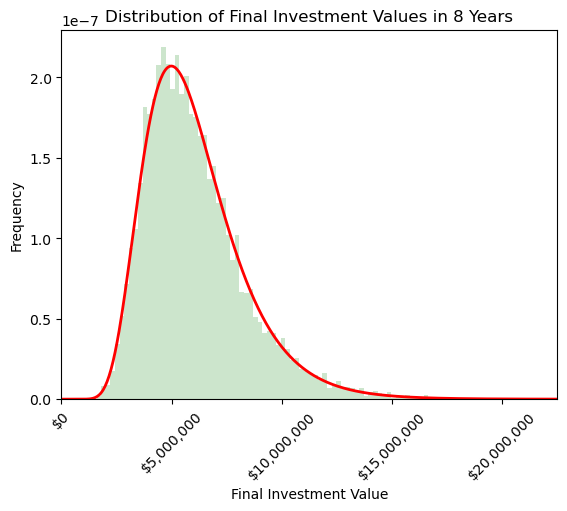

In [47]:
#fit an log normal distribution to the simulations data
from scipy.stats import lognorm
shape, loc, scale = lognorm.fit(simulations, floc=0)
# print(f"Shape: {shape}, Loc: {loc}, Scale: {scale}")
#calculate the 10th and 90th percentile
print(f"25th percentile: ${lognorm.ppf(0.25, shape, loc=loc, scale=scale):,.2f}")
print(f"50th percentile: ${lognorm.ppf(0.5, shape, loc=loc, scale=scale):,.2f}")
print(f"75th percentile: ${lognorm.ppf(0.75, shape, loc=loc, scale=scale):,.2f}")

#graph the distribution on the simulations data
x = np.linspace(0, max(simulations), 500)
plt.hist(simulations, bins=100, density=True, alpha=0.2, color='g')
plt.plot(x, lognorm.pdf(x, shape, loc=loc, scale=scale), 'r', linewidth=2)
plt.xlabel('Final Investment Value')
plt.ylabel('Frequency')
plt.title('Distribution of Final Investment Values in {} Years'.format(NUM_YEARS))
#conver x axis to dolar amounts
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
#rotate x axis labels
plt.xticks(rotation=45)
plt.xlim(0, max(simulations))
plt.show()

## Rental investing simulations (best case)

Shape: 0.04767754163534538, Loc: 0.0, Scale: 1257109.299557921
10th percentile: $1,182,597.93
50th percentile: $1,257,109.30
80th percentile: $1,308,578.34


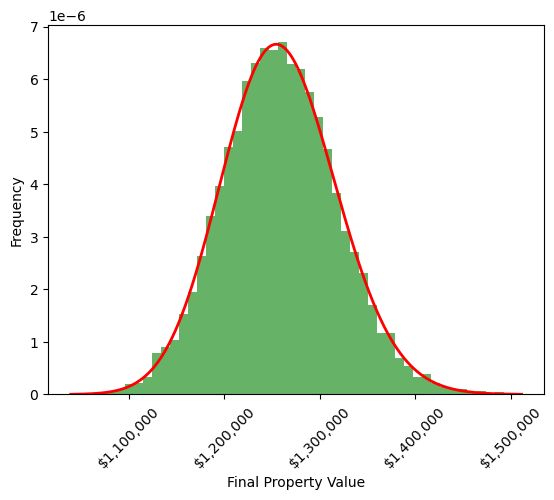

In [4]:

# Set initial values
initial_rent = 5000  # The initial monthly rent
avg_annual_rent_increase = 0.025  # The expected average annual rent increase
std_dev_rent_increase = 0.01  # Standard deviation of rent increase
annual_maintenance_cost_rate = 0.01  # Annual maintenance cost as a percentage of property value
property_value = 900000  # Initial property value
avg_property_appreciation = 0.04  # Average annual property appreciation
std_dev_property_appreciation = 0.015  # Standard deviation of property appreciation
vacancy_rate = 0.1  # Expected vacancy rate
tax_rate = 0.3  # Tax rate on rental income
inflation_rate = INFLATION_RATE  # The expected annual inflation rate
years = 10  # The number of years for the projection
num_simulations = 10000  # Number of Monte Carlo simulations
monthly_mortgage_payment = 5000  # The monthly mortgage payment


def simulate_property_value_and_income(property_value, annual_rent, num_years, avg_annual_rent_increase, std_dev_rent_increase, annual_maintenance_cost_rate, avg_property_appreciation, std_dev_property_appreciation, vacancy_rate, tax_rate, inflation_rate):
    year = 0
    while year < num_years:
        for month in range(12):
            # Simulate the monthly rent increase
            monthly_rent_increase = np.random.normal(avg_annual_rent_increase / 12, std_dev_rent_increase / np.sqrt(12))
            annual_rent *= (1 + monthly_rent_increase)

            # Calculate the monthly maintenance cost
            monthly_maintenance_cost = property_value * annual_maintenance_cost_rate / 12

            # Calculate the net monthly income
            net_monthly_income = annual_rent * (1 - vacancy_rate) / 12 - monthly_maintenance_cost - monthly_mortgage_payment

            # Apply tax
            net_monthly_income_after_tax = net_monthly_income * (1 - tax_rate)

            # Adjust for inflation and add to the property value
            property_value += net_monthly_income_after_tax / ((1 + inflation_rate) ** (year + month / 12))

            # Simulate the monthly property appreciation
            monthly_property_appreciation = np.random.normal(avg_property_appreciation / 12, std_dev_property_appreciation / np.sqrt(12))
            property_value *= (1 + monthly_property_appreciation)
        
        year += 1

    return property_value

# Perform the simulations
simulations = []
for _ in range(num_simulations):
    final_property_value = simulate_property_value_and_income(property_value, initial_rent * 12, years, avg_annual_rent_increase, std_dev_rent_increase, annual_maintenance_cost_rate, avg_property_appreciation, std_dev_property_appreciation, vacancy_rate, tax_rate, inflation_rate)
    simulations.append(final_property_value)

# Fit a log normal distribution to the simulations data
shape, loc, scale = lognorm.fit(simulations, floc=0)
print(f"Shape: {shape}, Loc: {loc}, Scale: {scale}")

# Calculate the 10th, 50th, and 80th percentile
print(f"10th percentile: ${lognorm.ppf(0.1, shape, loc=loc, scale=scale):,.2f}")
print(f"50th percentile: ${lognorm.ppf(0.5, shape, loc=loc, scale=scale):,.2f}")
print(f"80th percentile: ${lognorm.ppf(0.8, shape, loc=loc, scale=scale):,.2f}")

# Graph the distribution on the simulations data
x = np.linspace(min(simulations), max(simulations), 1000)
plt.hist(simulations, bins=50, density=True, alpha=0.6, color='g')
plt.plot(x, lognorm.pdf(x, shape, loc=loc, scale=scale), 'r', linewidth=2)
plt.xlabel('Final Property Value')
plt.ylabel('Frequency')

# Convert x axis to dollar amounts
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Rotate x axis labels
plt.xticks(rotation=45)
plt.show()


In [5]:
5_500_000*.035

192500.00000000003

Combine simulations

Shape: 0.3956747223202546, Loc: 0.0, Scale: 2171176.643906179
10th percentile: $1,307,597.77
50th percentile: $2,171,176.64
80th percentile: $3,029,136.21


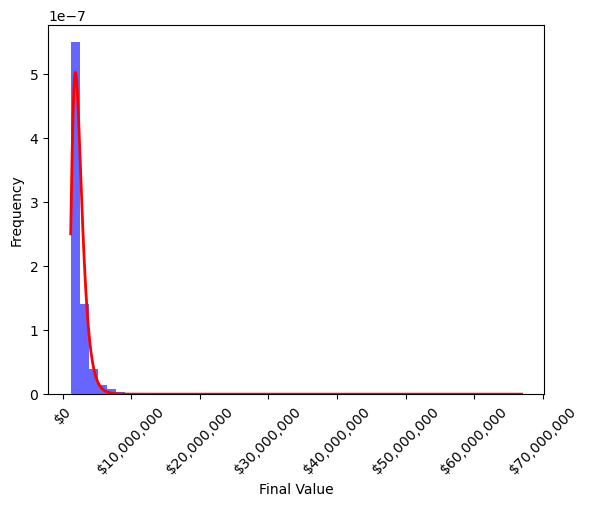

In [6]:

# Perform the simulations
total_sims = []
for _ in range(50000):
    final_property_value = simulate_property_value_and_income(property_value, initial_rent * 12, years, avg_annual_rent_increase, std_dev_rent_increase, annual_maintenance_cost_rate, avg_property_appreciation, std_dev_property_appreciation, vacancy_rate, tax_rate, inflation_rate)
    final_investment = simulate_investment(INITIAL_INVESTMENT, NUM_YEARS, REAL_RETURN, STANDARD_DEVIATION, MONTHLY_CONTRIBUTION, 0.0)
    total_sims.append(final_investment+final_property_value)

# Fit a log normal distribution to the simulations data
shape, loc, scale = lognorm.fit(total_sims, floc=0)
print(f"Shape: {shape}, Loc: {loc}, Scale: {scale}")

# Calculate the 10th, 50th, and 80th percentile
print(f"10th percentile: ${lognorm.ppf(0.1, shape, loc=loc, scale=scale):,.2f}")
print(f"50th percentile: ${lognorm.ppf(0.5, shape, loc=loc, scale=scale):,.2f}")
print(f"80th percentile: ${lognorm.ppf(0.8, shape, loc=loc, scale=scale):,.2f}")

# Graph the distribution on the simulations data
x = np.linspace(min(total_sims), max(total_sims), 1000)
plt.hist(total_sims, bins=50, density=True, alpha=0.6, color='b')
plt.plot(x, lognorm.pdf(x, shape, loc=loc, scale=scale), 'r', linewidth=2)
plt.xlabel('Final Value')
plt.ylabel('Frequency')

# Convert x axis to dollar amounts
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Rotate x axis labels
plt.xticks(rotation=45)
plt.show()


# Simple Annual Growth projection

In [7]:
def calculate_future_value(principal, monthly_contribution, annual_interest_rate, years):
    monthly_interest_rate = annual_interest_rate / 12 / 100
    months = years * 12

    future_value = principal
    for _ in range(months):
        future_value += future_value * monthly_interest_rate + monthly_contribution

    return future_value




In [8]:
# Input values
initial_principal = 1000  # $1,000,000
monthly_contribution = 0/12  # $10,000
annual_interest_rate = 10  # 6.5% Conservatively, accounting for 3% inflation and only 9.5% annual return (stocks market average)
years = 1


# Calculate future value
future_value = calculate_future_value(initial_principal, monthly_contribution, annual_interest_rate, years)
print(f"Given a {annual_interest_rate}% annual interest rate, the future value after {years} years: ${future_value:.2f}")

Given a 10% annual interest rate, the future value after 1 years: $1104.71


# Life Insurance Projecton vs SP500

In [9]:
#Life Insurance Projecton vs SP500

df = pd.read_csv('/Users/nguyendvu/local_repo/personal-finance/sp500p2p.csv')

df['Annual Returns With Dividends'] = df['Annual Returns With Dividends']/100
#adjust for inflation of 3%
df['Annual Returns With Dividends_inflation_adj'] = df['Annual Returns With Dividends'] - 0.03

In [10]:

#5 years rolling average
df['5 Year Rolling Average'] = df['Annual Returns With Dividends'].rolling(window=5).mean()
df['10 Year Rolling Average'] = df['Annual Returns With Dividends'].rolling(window=10).mean()
df['20 Year Rolling Average'] = df['Annual Returns With Dividends'].rolling(window=20).mean()

In [11]:
df.tail()

,Year,Annual Returns With Dividends,Annual Returns With Dividends_inflation_adj,5 Year Rolling Average,10 Year Rolling Average,20 Year Rolling Average
23,2018,-0.000423,-0.030423,0.000881,0.001350,0.000712
24,2019,0.003121,-0.026879,0.001235,0.001402,0.000759
25,2020,0.001802,-0.028198,0.001568,0.001434,0.000894
26,2021,0.002847,-0.027153,0.001902,0.001698,0.001096
27,2022,-0.001801,-0.031801,0.001109,0.001359,0.001116


In [12]:
# df.to_csv('/Users/nguyendvu/local_repo/personal-finance/sp500p2p.csv', index=False)

In [13]:
df['Annual Returns With Dividends_inflation_adj'].mean()*100

-2.8844749999999992

In [14]:
for c in df.columns[1:]:
    value = df[c].mean()*100
    print(f"{c} mean is {value:.2f}%")

Annual Returns With Dividends mean is 0.12%
Annual Returns With Dividends_inflation_adj mean is -2.88%
5 Year Rolling Average mean is 0.10%
10 Year Rolling Average mean is 0.09%
20 Year Rolling Average mean is 0.09%


In [15]:
#locate where '5 Year Rolling Average', '10 Year Rolling Average'	and '20 Year Rolling Average' is below 0
print(df.loc[df['5 Year Rolling Average'] < 0])
print(df.loc[df['10 Year Rolling Average'] < 0])
print(df.loc[df['20 Year Rolling Average'] < 0])


    Year  Annual Returns With Dividends  \
9  2004                        0.001074   

   Annual Returns With Dividends_inflation_adj  5 Year Rolling Average  \
9                                    -0.028926               -0.000075   

   10 Year Rolling Average  20 Year Rolling Average  
9                 0.001395                      NaN  
Empty DataFrame
Columns: [Year, Annual Returns With Dividends, Annual Returns With Dividends_inflation_adj, 5 Year Rolling Average, 10 Year Rolling Average, 20 Year Rolling Average]
Index: []
Empty DataFrame
Columns: [Year, Annual Returns With Dividends, Annual Returns With Dividends_inflation_adj, 5 Year Rolling Average, 10 Year Rolling Average, 20 Year Rolling Average]
Index: []


In [16]:
insurance_df = pd.read_csv('/Users/nguyendvu/local_repo/personal-finance/Insurance_policy.csv')
print(insurance_df.columns)
insurance_df.head()

Index(['Policy Year', 'Age', 'Planned Premium', 'Loan', 'Annual Income',
       'Accumulated Value', 'Surrender Value', 'Net Death Benefit'],
      dtype='object')


,Policy Year,Age,Planned Premium,Loan,Annual Income,Accumulated Value,Surrender Value,Net Death Benefit
0,1,4,2950,0.0,0.0,1733.981766,0.000000,1000000.0
1,2,5,2950,0.0,0.0,3579.025408,0.000000,1000000.0
2,3,6,2950,0.0,0.0,5535.659622,0.000000,1000000.0
3,4,7,2950,0.0,0.0,7614.694666,0.000000,1000000.0
4,5,8,2950,0.0,0.0,9825.603614,1055.603618,1000000.0


In [17]:
#add a column to calculate annual return from SP500 given the Planned Premium collumn as the annual contribution amount
insurance_df['total_SP500_Return'] = 0
#assume the annual return is the average annual return of the SP500
insurance_df['Avg_sp500_pct_inflation_adj'] = 8.55/100
for i in range(len(insurance_df)):
    if i == 0:
        insurance_df.loc[i, 'total_SP500_Return'] = insurance_df.loc[i, 'Planned Premium']
    else:
        insurance_df.loc[i, 'total_SP500_Return'] = insurance_df.loc[i-1, 'total_SP500_Return']*(1+insurance_df.loc[i, 'Avg_sp500_pct_inflation_adj']) + insurance_df.loc[i, 'Planned Premium']

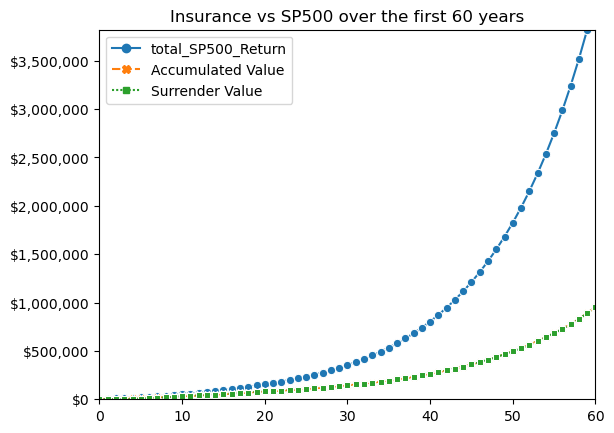

In [18]:
plt.Figure(figsize=(20, 10))
insurance_df.set_index('Policy Year')
plotdf = insurance_df[['total_SP500_Return', 'Accumulated Value', 'Surrender Value']]
sns.lineplot(data=plotdf, markers=True)
xlim = (0, 60)
plt.xlim(xlim)
plt.ylim(plotdf.iloc[xlim[0]:xlim[1]].min().min(), plotdf.iloc[xlim[0]:xlim[1]].max().max())
#y unit should be $
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))
plt.title(f'Insurance vs SP500 over the first {xlim[1]-xlim[0]} years')
plt.show()

In [19]:
# 
# insurance_df.to_csv('/Users/nguyendvu/local_repo/personal-finance/Insurance_vsp500.csv', index=False)

In [21]:
owed = 21510
late_fee = 1080
cash = 2800
escrow = 1900

erap_qual = 12460



In [23]:
owed - escrow - cash - erap_qual


4350

In [24]:
owed - escrow - cash

16810

In [25]:
100*12

1200

In [27]:
4350-(150*12)

2550

In [28]:
[x for x in range(7,7*10, 7)] 

[7, 14, 21, 28, 35, 42, 49, 56, 63]

In [39]:
x = "a, b, c, d"
x = [i.strip() for i in x.split(",")]


In [40]:
x

['a', 'b', 'c', 'd']

Buy or sell 1

In [14]:
def calculate_profit_hold(rent_per_month, monthly_expenses, appreciation_rate, property_value, years, vacancy_rate, maintenance_increase, rent_increase_rate, original_purchase_price, capital_gains_tax_rate, selling_costs):
    """
    Calculate the profit from holding the property and renting it out considering additional factors.

    :param rent_per_month: Monthly rental income
    :param monthly_expenses: Monthly expenses (taxes, maintenance, etc.)
    :param appreciation_rate: Annual appreciation rate of the property value in percentage
    :param property_value: Current value of the property
    :param years: Number of years planning to hold the property
    :param vacancy_rate: Expected vacancy rate as a percentage of total possible rent
    :param maintenance_increase: Yearly increase in maintenance costs as a percentage
    :param rent_increase_rate: Yearly rent increase as a percentage
    :return: Total profit from renting out the property
    """
    total_rent_profit = 0
    current_rent = rent_per_month
    current_expenses = monthly_expenses
    inflation_factor = 1
    for year in range(1, years + 1):
        # Adjust rent and expenses for the year
        current_rent *= (1 + rent_increase_rate / 100)
        current_expenses *= (1 + maintenance_increase / 100)
        # Calculate annual profit considering the vacancy rate
        annual_profit = (current_rent * 12 * (1 - vacancy_rate / 100)) - (current_expenses * 12)
        total_rent_profit += annual_profit
        # Adjust for inflation
        inflation_factor = inflation_factor * (1 - 0.03)

    # Calculate property appreciation
    final_property_value = property_value * ((1 + appreciation_rate / 100) ** years)
    appreciation_gain = final_property_value - property_value
    capital_gain = final_property_value - original_purchase_price
    capital_gains_tax = capital_gain * (capital_gains_tax_rate / 100)
    net_sale_price = final_property_value - (final_property_value * (selling_costs / 100))

    

    return (total_rent_profit + net_sale_price - original_purchase_price - capital_gains_tax)*inflation_factor

def calculate_profit_sell(property_value, selling_costs, capital_gains_tax_rate, original_purchase_price, appreciation_rate, years):
    """
    Calculate the profit from selling the property considering property appreciation.

    :param property_value: Current value of the property
    :param selling_costs: Selling costs in percentage of the sale price
    :param capital_gains_tax_rate: Capital gains tax rate in percentage
    :param original_purchase_price: The price at which the property was originally purchased
    :param appreciation_rate: Annual appreciation rate of the property value in percentage
    :param years: Number of years the property was held before selling
    :return: Net profit from selling the property
    """
    final_property_value = property_value * ((1 + appreciation_rate / 100) ** years)
    capital_gain = final_property_value - original_purchase_price
    capital_gains_tax = capital_gain * (capital_gains_tax_rate / 100)
    net_sale_price = final_property_value - (final_property_value * (selling_costs / 100))
    return net_sale_price - original_purchase_price - capital_gains_tax

# Example usage:
rent_per_month = 5365
monthly_expenses = 2500
appreciation_rate = 1
property_value = 950000
years = 5
selling_costs = 6
capital_gains_tax_rate = 15
original_purchase_price = 680000
vacancy_rate = 50
maintenance_increase = 2
rent_increase_rate = 0

profit_hold = calculate_profit_hold(rent_per_month, monthly_expenses, appreciation_rate, property_value, years, vacancy_rate, maintenance_increase, rent_increase_rate, original_purchase_price, capital_gains_tax_rate, selling_costs)
profit_sell = calculate_profit_sell(property_value, selling_costs, capital_gains_tax_rate, original_purchase_price, appreciation_rate, years)

print(f"Profit if held and rented out: ${profit_hold:.2f}")
print(f"Profit if sold: ${profit_sell:.2f}")


Profit if held and rented out: $182471.89
Profit if sold: $210783.04


In [9]:
2500*12

30000

In [67]:
10*.7


7.0

In [68]:
7*.7

4.8999999999999995

In [69]:
10*.49

4.9